In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs=8

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 879.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision import *
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Mastercourse/Insect Classifier

/content/drive/My Drive/Mastercourse/Insect Classifier


In [ ]:
doc(search_images_ddg)

In [ ]:
insect_names=[
    'Africanized Bees',
    'Aphids',
    'Armyworms',
    'Stink Bugs',
    'Potato Beetles',
    'Cabbage Loopers',
    'Corn Borers',
    'Corn Earwormes',
    'Fruit Flies',
    'Thrips',
    'Tomato Hornworms',
    'Corn Rootworms']
len(insect_names)

12

In [ ]:
images=search_images_ddg(insect_names[0])
f"No of images => {len(images)} -- One image url => {images[0]}"

'No of images => 200 -- One image url => http://i.cdn.turner.com/cnn/2010/US/10/21/georgia.bees.fatality/story.africanized.bees.usda.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest="Africanized Bees.jpg"
download_url(images[0],dest,show_progress=False)

Path('Africanized Bees.jpg')

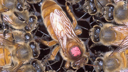

In [ ]:
image=Image.open(dest)
image.to_thumb(128,128)

In [ ]:
data_path='data'
if not os.path.exists(data_path):
  os.mkdir(data_path)
for insect_type in insect_names:
  dest=f"{data_path}/{insect_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)
  try:
    insect_names_urls=search_images_ddg(insect_type)
    download_images(dest,urls=insect_names_urls)
  except:
    continue

In [ ]:
image_counts=get_image_files(data_path)
image_counts

(#3498) [Path('data/Africanized Bees/Image_110.jpg'),Path('data/Africanized Bees/Image_104.jpg'),Path('data/Africanized Bees/Image_106.jpg'),Path('data/Africanized Bees/Image_1.jpg'),Path('data/Africanized Bees/Image_10.jpg'),Path('data/Africanized Bees/Image_108.jpg'),Path('data/Africanized Bees/Image_105.jpg'),Path('data/Africanized Bees/Image_100.jpg'),Path('data/Africanized Bees/Image_107.png'),Path('data/Africanized Bees/Image_102.jpg'),Path('data/Africanized Bees/Image_26.jpg'),Path('data/Africanized Bees/Image_21.jpg'),Path('data/Africanized Bees/Image_27.jpg'),Path('data/Africanized Bees/Image_20.jpg'),Path('data/Africanized Bees/Image_2.jpg'),Path('data/Africanized Bees/Image_12.jpg'),Path('data/Africanized Bees/Image_120.jpg'),Path('data/Africanized Bees/Image_49.jpg'),Path('data/Africanized Bees/Image_15.jpg'),Path('data/Africanized Bees/Image_13.jpg')...]

In [ ]:
failed=verify_images(image_counts)
failed

(#57) [Path('data/Africanized Bees/17dbf150-b31f-4ba6-9ff6-e3b1e4407265.jpeg'),Path('data/Africanized Bees/e74d7c18-b653-41e2-a77a-e6d4001a6e06.jpg'),Path('data/Africanized Bees/d80f640a-6c9b-4c0f-84f0-5de363f656dd.jpg'),Path('data/Africanized Bees/a7ceb8ef-c0e4-49fb-9308-2950115db419.jpg'),Path('data/Africanized Bees/80a8d353-ef80-4812-896e-3fc9f6d4ca10.jpg'),Path('data/Africanized Bees/129d74c0-6d03-4f08-ad02-70183ebfe255.jpg'),Path('data/Africanized Bees/19044640-5e86-4341-963b-8f348990ae6e.jpg'),Path('data/Africanized Bees/47d5286b-c670-46b6-94c6-469bc97a1cb9.jpg'),Path('data/Armyworms/55e6d4f9-f5a0-4add-91ac-01640fd5ef8e.jpg'),Path('data/Armyworms/a5fe5807-cdbf-4b74-a48d-9dc4666ae7ca.jpg'),Path('data/Aphids/acb21f30-cbff-4256-a869-29b4e034d96b.jpg'),Path('data/Aphids/b7e3852c-15ce-440a-b46e-dc8b9a3b1aa5.jpg'),Path('data/Aphids/de5924bf-2779-4eb3-975d-9dde4cc7f573.jpg'),Path('data/Stink Bugs/c535e036-3b6b-4d50-bc4b-06bf612af058.jpg'),Path('data/Stink Bugs/5ee00027-55d3-4a04-98e1-4b

In [ ]:
failed.map(Path.unlink)

(#57) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
dblock=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [ ]:
!pip install Pillow


In [ ]:
dls=dblock.dataloaders(data_path,bs=bs)

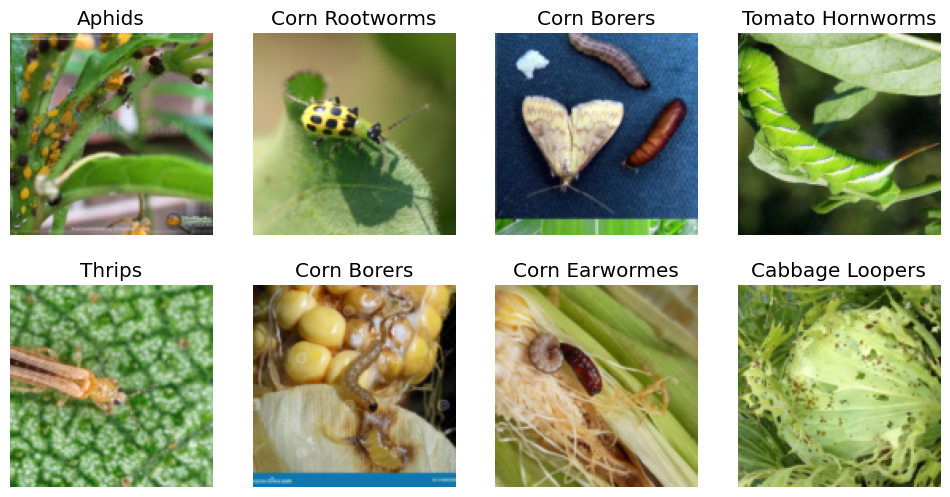

In [ ]:
dls.train.show_batch(max_n=8,nrows=2)

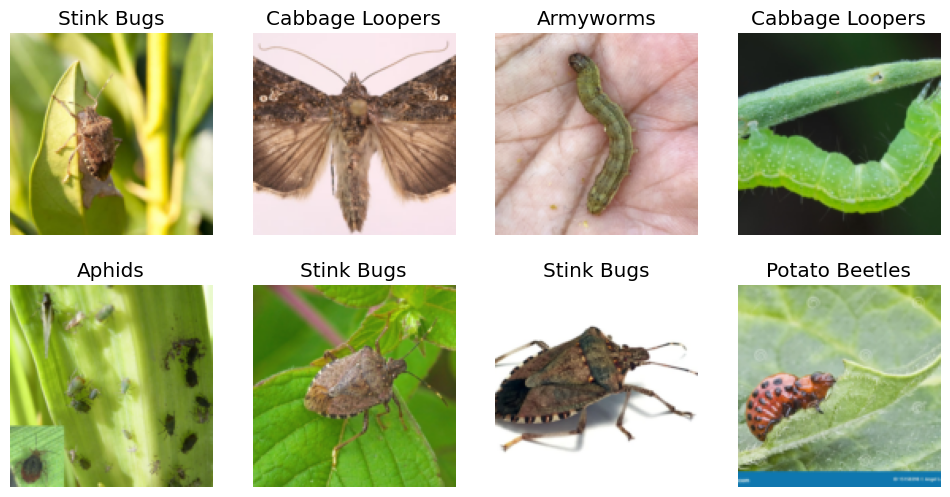

In [ ]:
dls.valid.show_batch(max_n=8,nrows=2)



```
# This is formatted as code
```

# Data Augmentation

In [ ]:
doc(aug_transforms)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


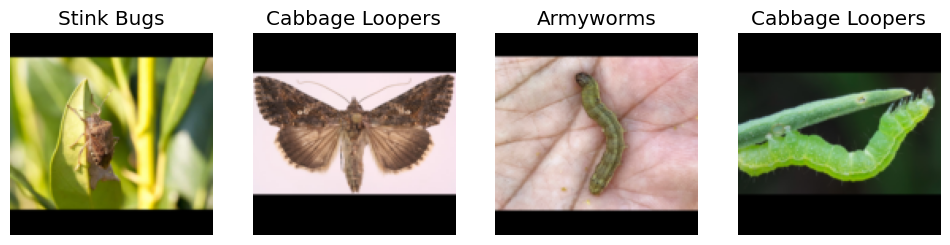

In [ ]:
dblock=dblock.new(item_tfms=Resize(128,ResizeMethod.Pad,pad_mode='zeros')) #Padding the extra spaced whole image into (128x128) size without distorting
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)


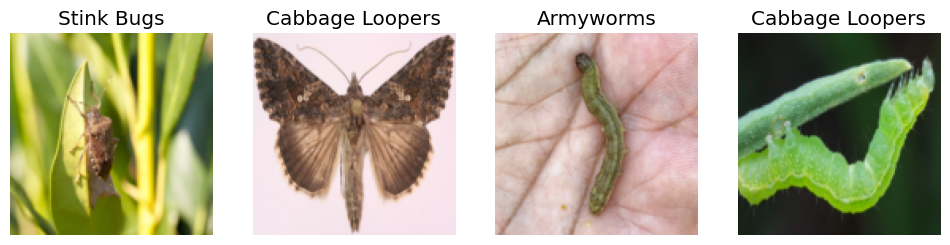

In [ ]:
dblock=dblock.new(item_tfms=Resize(128,ResizeMethod.Squish)) #Squishing the whole image into (128x128 size)
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)

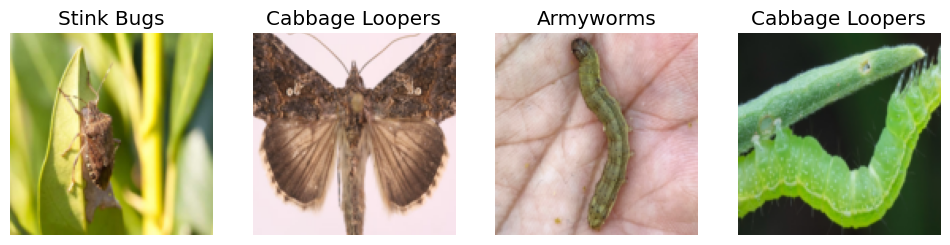

In [ ]:
dblock=dblock.new(item_tfms=RandomResizedCrop(128,min_scale=0.3)) #Randomly cutting,cropping,resizing,coloring parts of image into (128x128) image
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4,nrows=1)

In [ ]:
doc(aug_transforms)

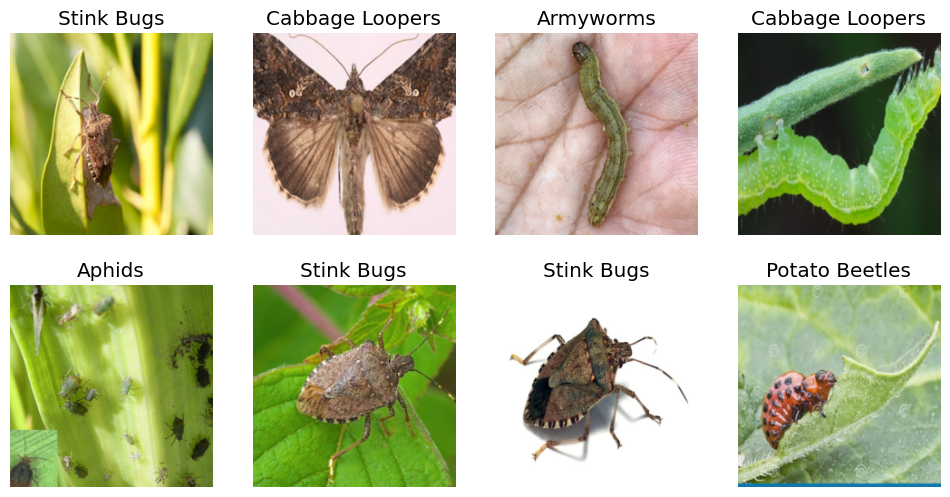

In [ ]:
dblock=dblock.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),batch_tfms=aug_transforms()) #Randomly cutting,cropping,resizing,coloring parts of image into (128x128) image
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8,nrows=2)

In [ ]:
torch.save(dls,"insect_dataloader_v0.pk1")